### EASY EXAMPLE

#### y = a + bX

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1111) # son aleatorios pero parten de la misma semilla para construirlo, sin la semilla serian distintos

#X = 2 * np.random.rand(100, 1) 
#y = 4 + 3 * X + np.random.randn(100, 1)

X = np.arange(100) #del 0 al 100
y = np.arange(200) # del 0 al 200
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [8]:
type(X)

numpy.ndarray

In [12]:
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
y = y[100:]
y

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [4]:
y.shape

(100,)

In [5]:
# Vector
X.shape

(100,)

In [14]:
# comvertir vector en formato Matriz
X = X.reshape(-1, 1)
X.shape

(100, 1)

In [15]:
X.reshape(-1, 1).shape

(100, 1)

In [16]:
X.shape

(100, 1)

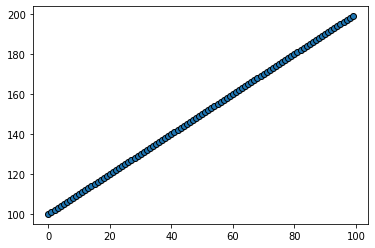

In [17]:
#correlacion 1 absoluta, 
# la secante en este caso vale 100, cuando x vale 0 y vale 100 y esa es la secante
# b seria la secante, cuanto aumenta x cuanto aumenta y, en este caso y aumneta 1 
plt.scatter(X,y, edgecolor='black')

In [34]:
#X_val = [5, 80, 40, 24, 8]
#y_val = [105, 180, 140, 124, 108]
"""
esto es lo que haria la funcion de abajo coge de manera aleatoria el 80 y el 20 % pero a su vez ordenada de la misma manera para el eje x y el eje y. 
X_train = [40,24,80,5]
y_train=[140,124,180,105
x_test= [8]
y_test = [108]"""

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


train_errors, val_errors = [], []

def plot_learning_curves(model, X, Y):
    """
    80% Train
    20% test cogeria la x_val o y_val
    a la funcion le estamos pasando el conjunto de datos 
    """
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    #x_train seria el 80 %
    
    for m in range(1, len(X_train)//7):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y) #coge el modelo y el fit es entrena el modelo con nuestra x y nuestra y 

        y_train_predict = model.predict(x) #predice x 
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
        if m < 4:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

##### ITERACIÓN 1 #####
x [[99]]
y [199]
y_train_predict [199.]
-----
X_val
 [[56]
 [63]
 [48]
 [84]
 [87]
 [70]
 [32]
 [30]
 [73]
 [ 6]
 [19]
 [77]
 [15]
 [46]
 [58]
 [16]
 [49]
 [ 1]
 [53]
 [35]]
y_val_predict [199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199.
 199. 199. 199. 199. 199. 199.]
##### ITERACIÓN 2 #####
x [[99]
 [37]]
y [199 137]
y_train_predict [199. 137.]
-----
X_val
 [[56]
 [63]
 [48]
 [84]
 [87]
 [70]
 [32]
 [30]
 [73]
 [ 6]
 [19]
 [77]
 [15]
 [46]
 [58]
 [16]
 [49]
 [ 1]
 [53]
 [35]]
y_val_predict [156. 163. 148. 184. 187. 170. 132. 130. 173. 106. 119. 177. 115. 146.
 158. 116. 149. 101. 153. 135.]
##### ITERACIÓN 3 #####
x [[99]
 [37]
 [71]]
y [199 137 171]
y_train_predict [199. 137. 171.]
-----
X_val
 [[56]
 [63]
 [48]
 [84]
 [87]
 [70]
 [32]
 [30]
 [73]
 [ 6]
 [19]
 [77]
 [15]
 [46]
 [58]
 [16]
 [49]
 [ 1]
 [53]
 [35]]
y_val_predict [156. 163. 148. 184. 187. 170. 132. 130. 173. 106. 119. 177. 115. 146.
 158. 116. 149. 101. 153. 135.]


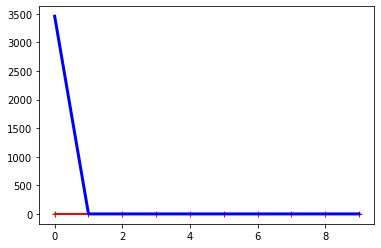

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [20]:
# y = a + bX

# b, pendiente
b = lin_reg.coef_ 
b

array([1.])

In [21]:
# a, secante
a = lin_reg.intercept_
a

100.0

In [22]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 0.0, 5.385290446308774e-28, 0.0, 0.0, 6.731613057885967e-29, 5.769954049616543e-29, 0.0, 8.975484077181289e-29, 1.6155871338926323e-28]
val_errors

 [3458.3, 5.048709793414476e-29, 7.169167906648555e-28, 0.0, 0.0, 5.048709793414476e-29, 5.048709793414476e-29, 0.0, 0.0, 0.0]


### Para inferir:

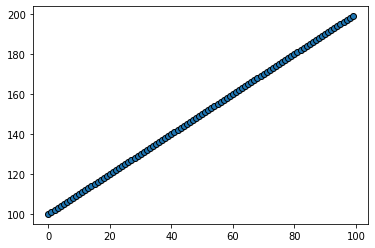

In [23]:
plt.scatter(X,y, edgecolor='black')

In [25]:
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1) #transformar un numero a matriz, es necesario para predecir un numero. 
    return model.predict(to_predict)

In [26]:
predict(lin_reg, number=105)

array([205.])

In [27]:
#y = a + bx
y_ = 100 + 1*105
y_

205

In [28]:
lin_reg.score(X, y) * 100

100.0

### Dibujando la línea

In [ ]:
lin_reg.predict(X)
#ejecutar

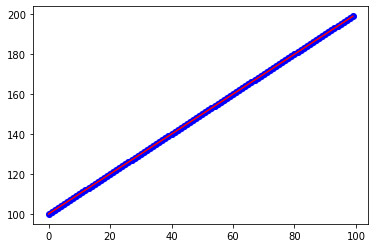

In [45]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

## 2.

In [46]:
#X = 2 * np.random.rand(100, 1) 
#y = 4 + 3 * X + np.random.randn(100, 1)

X = np.arange(100)
y = np.arange(200)

print(X)
y = y[100:]
y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [47]:
X = X.reshape(-1, 1)

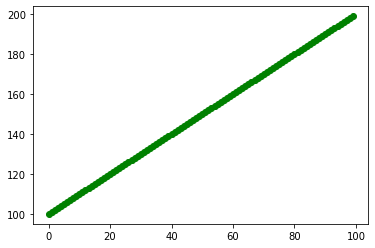

In [48]:
new_model = LinearRegression()
new_model.fit(X, y)

plt.scatter(X, y, color='g')


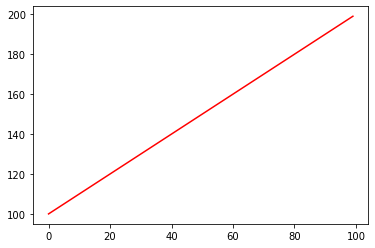

In [49]:
plt.plot(X, new_model.predict(X), color='red')

## 3. 

In [50]:
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)

#X = np.arange(100000)
#y = np.arange(200000)
X = X.reshape(-1, 1)
print(X.shape)
#y2 = y2[100:]
y.shape

(100, 1)


(100, 1)

In [51]:
#n_jobs = -1 -- all cores 
new_model2 = LinearRegression(n_jobs=-1)
new_model2.fit(X, y)

LinearRegression(n_jobs=-1)

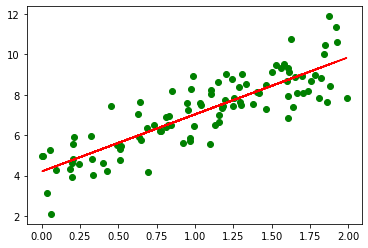

In [52]:
plt.scatter(X, y, color='g')
plt.plot(X, new_model2.predict(X), color='red')

In [54]:
new_model2.score(X, y) * 100

72.44420583490864

In [ ]:
#secante
#ejecutar
new_model2.intercept_